# A Master Class in Directed Acyclic Graphs in Causal Inference

## A step-by-step explanation of Directed Acyclic Graphs from the basics to more advanced aspects

In [2]:
import sys
sys.path.insert(1, r'C:\Users\GHarrison\OneDrive - Lincoln College\Python Projects\Data Science\Utilities')

from Causal.lib.causal_tools2 import DirectedAcyclicGraph

## Objective
Having spent a lot of time researching causal inference I began to realise that I did not have a full grasp of Directed Acyclic Graphs (DAGs) and that this was hampering my efforts to develop my understanding to a point where I could apply it in order to solve real-world problems.

This objective of this article is to document my learning journey and to share everything you need to know about DAGs in order to take your understanding of Causal Inference to the next level.

## Background
I would like to start by proposing a deinfition for causal inference -

"Causal inference is the process of reasoning and the application of conclusions drawn from cause-and-effect relationships between variables while taking into account potential confounding factors and biases."

That is quite a mouthful but it does encapsulate the key points -

1. It is the study of cause-and-effect.
2. The point is to draw conclusions that can be applied to solve real-world problems.
3. Any bias or "confounding" must be taken account of and compensated for.

Moving beyond the definition, there is an age old saying that "correlation does not imply causation" which leads to the question "so what does then?" 

It turns out that causation cannot be inferred or calculated from a set of data in isolation. That data needs to be extended and supplemented with additional information that can propose, visualise and represent the causal relationships and one common appraoch to the is to use a "Directed Acyclic Graph".


## A Simple DAG
At the most basic level DAGs are very simple indeed. The example below is representing the proposed relationship between taking a drug "D" and recovery "R" and the arrow is stating that taking the drug has a causal effect on recovery ...

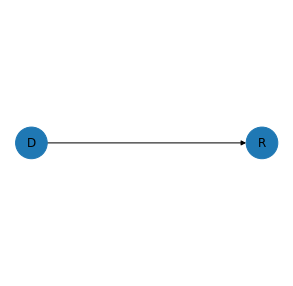

In [3]:
edges : list = [("D", "R")]
pos: dict = {"D": (1, 1), "R": (2,1)}
    
dag = DirectedAcyclicGraph(edges=edges, pos=pos, treatment="D", outcome="R")
dag.draw()

This DAG illustrates two of the key terms - "treatment" and "outcome".

- "treatment" refers to the action or intervention being studied or manipulated to determine its effect on the outcome. 
- "outcome" refers to the variable being measured to determine the effect of the treatment. 

In traditional machine learning terms the treatment is the independent variable(s) and the outcome the dependent varialble.

When I first studied DAGs I was confused by the terminology as "treatment" and "outcome" are typically medical terms and I wondered if DAGs and causal inference were limited to the medical domain. This is not the case, causal inference can be applied to any set of variables in any domain and I suspect the medical-sounding terminology has been borrowed because drug and treatment trials have a significan overlap with causal inference.

## A DAG with a "Confounder"

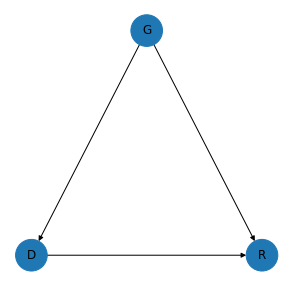

In [4]:
edges : list = [("D", "R"), ("G", "D"), ("G", "R")]
pos: dict = {"D": (1, 1), "G": (2,2), "R": (3, 1)}
    
dag = DirectedAcyclicGraph(edges=edges, pos=pos, treatment="D", outcome="R")
dag.draw()

This example adds another factor - "G" or gender. The arrows show that gender (G) has a causal affect on both the drug (D) and on recovery (R). The explanation for this is as follows -

- More males than females decide to take the drug so "Gender" causes "Drug".
- Females have a better natural recovery rate than males so "Gender" causes "Recovery".

This complicates things significantly. The objective is to establish the true effect of taking the drug on recovery but gender is affecting both so simply observing how many people in the trial took the drug and recovered does not provide an accurate answer.

This mixing effect is called "confounding" and a variable that causes this effect is a "confounder" which must be "de-confounded" to establish the true efficacy of the drug ...

## Randomized Control Trials, Stratification and Conditioning

In order to calculate the true effect of D on R we need to isolate and remove the effect of G. There are several approaches that can be applied including the following ...

### Randomized Control Trials

If this was a trial that was being planned, one tried-and-tested approach would be to create a "Randomized Control Trial" (RCT). This would involve randomly assigning the drug trial subjects into a test group that receives the drug and a control group that received a placebo. (Note: it is important not to tell the subjects which group they have been allocated to).

It is now impossible for gender to be causing or influencing who takes the drug because subjects are assigned randomly . This effetively "rubs out" the causal relationship between "G" and "D" - 

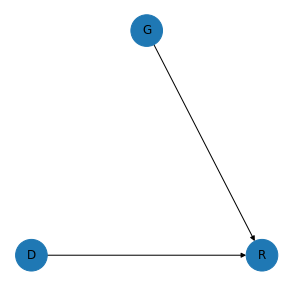

In [3]:
edges : list = [("D", "R"), ("G", "R")]
pos: dict = {"D": (1, 1), "G": (2,2), "R": (3, 1)}
    
dag = DirectedAcyclicGraph(edges=edges, pos=pos, treatment="D", outcome="R")
dag.draw()

However, if the study is based on existing, observed, historical data then it is too late to randomly assign the test and control groups and an RCT cannot be used.

Another big challenge with RCTs is that if this were a trial into smoking or obesity it would be immoral and unethical to divide the subjects randomly and force one group to smoke or another to become obsese so clearly moral and ethical boundaries limit the applicability of RCTs.

Fortunately there are other approaches that can be applied to observational data to mitigate these challenges including "stratification".

### Stratification

In our example, if the subjects were 60% male and 40% female the affect of the drug "D" on recovery "R" can be isolated and calculated as follows -

1. Calculate the recovery for males and multiply by 0.6 (as 60% are males).
2. Calculate the recovery for females and multiply by 0.4 (as 40% are females).
3. Add the two numbers together and this gives the affect of the drug on recovery independent from the impact of gender.

Unfortunately there are some additional challenges with stratification and similar statistical techniques.  For example, if there are a large number of causal relationships the stratification could become very complicated; consider the following DAG ...

- A = Parental Smoking
- B = Childhood Asthma
- C = Underlying Atopy (Unobserved)
- D = Parental Asthma
- E = Chronic Bronchitis
- F = Sex
- G = Socio-economic Status
- X = Smoking
- Y = Asthma

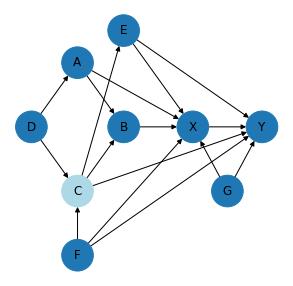

In [4]:
unobserved_confounders = ["C"]
edges : list = [("A", "B"), ("A", "X"), ("B", "X"), ("C", "E"), ("C", "B"), ("C", "Y"), ("D", "A"), ("D", "C"), ("E", "X"), ("E", "Y"), ("F", "C"), ("F", "X"), ("F", "Y"), ("G", "X"), ("G", "Y"), ("X", "Y")]
pos : dict = {"D": (1, 3), "F": (2, 1), "C": (2, 2), "A": (2, 4), "B": (3, 3), "E": (3, 4.5), "X": (4.5, 3), "G": (5.25, 2), "Y": (6, 3)}

dag = DirectedAcyclicGraph(treatment="X", outcome="Y", edges=edges, pos=pos, unobserved_confounders=unobserved_confounders)
dag.draw()

The first challenge is working out which variables to stratify on which is no easy problem to solve. It would require either someone with a lot of experience of causal relationships or a good causal inference software library and both are in short supply!

The second challenge is that stratification on 3 variables with 4 sub-groups in each variable requires 3 x 4 = 12 stratified groups, hence the number of samples in each becomes smaller and smaller and less significant.

To resolve these problems requires an alternative technique and this is where causal inference and conditioning come in ...

### Conditioning

It sounds like magic but conditioning can "simulate" the affect of a Randomized Control Trial on historical and observational data by "adjusting" for all the variables that are "confounders" i.e. affecting both the treatment and the outcome.

Here is the causal inference formula that performs backdoor adjustment for a single treatment variable (X) on a single outcome variable (Y) with a single confounder (Z) -

$$
P(Y \mid do(X)) = \sum_{z} P(Y\mid X, Z=z)\ P(Z=z)
$$


The key takeaway is that the left hand side is describing an "intervention", for example "assign everyone to take the drug" (do(X) or do(Drug)) which is re-written on the right hand side and expressed in terms of purely observational data.

A detailed explanation of the maths is beyond the scope of this article but if you would like to see a fully worked example, check this link out -

https://towardsdatascience.com/unlock-the-power-of-causal-inference-a-data-scientists-guide-to-understanding-backdoor-686d2826efa4

## Recap
At this point we have defined causal inference, explored the purpose of DAGs and explained confounders, RCTs, stratification and conditioning.

Armed with this understnading and terminology we are now ready to explore and the more complex aspects of DAGs which are often not explained clearly in the available books and online articles.

## Paths
Okey dokey!!

## Background
Having read Judea Pearl's "The Book of Why" (twice) and then moved onto "Causal Inference in Statistics" I was beginning to improve my undersatanding of causal inference and critically the role this exciting subject has in delivering organisational impact and outcomes from data.

These texts and other articles discuss how to look at a "path" through a causal diagram and understand how to "condition" so that the true causal impact of a treatment variable on an outcome variable can be understood in isolation, even if both are being "confounded".

That sentence alone can seem daunting to those new to the area so this article is going to de-mystify that part of it and then explain the simple rules involved in achieving "deconfounding" no matter how complicated the causal relationships are.

## A Refresher on Causal Inference and Directed Acyclic Graphs

My favourite definition of causal inference is "the study of understanding cause-and-effect relationships between variables while taking into account potential confounding factors and biases."

One of the key points is that causality i.e. cause-and-effect cannot be established from data alone and any attempt to ascertain the impact of one feature or variable on another is likely to be inaccurate if there are causal relationships in the real world that the data is modelling.

There are several approaches to resolving this but a common and highly visual approach is to supplement te data with a Directed Acyclic Graph or "DAG" that shows a proposal for the causal relationships based on domain expertise -

This DAG is propsing that taking a drug (D) has a causal impact on recvovery (R) and not the other way around.

Here our feature "D" is referred to as the "treatment" and "R" as the outcome. Note that "treatment" does not infer anything medical. Although the example is medical as it is showing the causal effect of a drug on a patient outcome the "treatment" could just as easilt be something like attending a training course, studying additional hours or changing the percentage split of fossil and non-fossil fuels.

However, most DAGs and the causality they represent are not that simple. It is common for additional features to exist that "confound" the treatment and the outcome -

In this DAG a third variable "G" has been introduced to represent gender based on additional findings relating to the drug trial -

- More males than females decide to take the drug.
- Females have a better natural recovery rate than males.

This means that gender is causing both the taking of the drug and recovery rates as well as taking the drug affecting recovery which must be adjusted for if the true effect of taking the drug on recovery is to be understood.

## Conditioning

If there is nothing "confounding" the effect of "D" and "R" then the probability of recovery can be expressed as  -

$$
P(Recovery=1 \mid Drug=1)
$$

i.e. what is the probability of recovery given that the drug was taken.

But if there is a confounder like "Gender" in the diagram above then P(Recovery=1 | Drug=1) does not give the correct answer.

In order to isolate the effect of "D" on "R" requires that "G" or Gender is "conditioned" as follows -

1. Gender is fixed at its first value (say "Male").
2. P(R | D) is calculated for that fixed value.
3. Gender is fixed again at its second value (say "Female").
4. P(R | D) is calculated for that fixed value.
5. If 60% of the trial subjects were Male and 40% female then the final answer is 0.6 x the first fixed value + 0.4 x the second fixed value.

This is the essence of conditioning. The groups (male and female in this example) could be split up and measured separately at the start of the trial if this were a real-world, randomised control trial.

Alternatively, if the data has already been observed and captured there is a mathematical formula called the "backdoor adjustment formula" that will perform the calculation ...

For D (Drug), R (Recovery) and G (Gender) the formula can be re-written as follows -

$$
P(R=1 \mid do(D=1)) = \sum_{g} P(R\mid D, G=g)\ P(G=g)
$$

If you would like a detailed explanation of the formula, please check this article out ... but the main thing to take away is that there is an approach in real world experiments (dividing the subject up into male and female) and an approach in mathematics (applying the backdoor adjustment formula) that will both work for "conditioning" the confounding variable such that the true effect of the treatment on the outcome can be calculated.

## Forks, Chains and Colliders

In the diagram above the pattern is commonly referred to as a "fork" because the two arrows from the confounder G are facing away from the node.

There are only two other patterns to consider which, when added to the "fork" pattern cover all eventualities.

The first pattern, which we have already seen, is a fork -

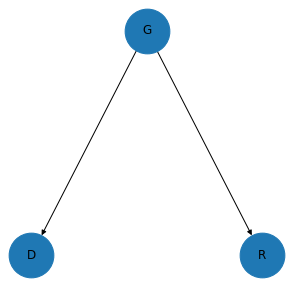

In [8]:
edges_2 : list = [("G", "D"), ("G", "R")]
pos_2: dict = {"D": (1, 1), "G": (2,2), "R": (3, 1)}
    
dag_2 = DirectedAcyclicGraph(edges=edges_2, pos=pos_2, treatment="D", outcome="R")
dag_2.draw()

This is a small variation on the DAG above because for a fork only requires a double arrow from a node like G into nodes D and R; D and R do not have to be causally linked directly.

The second pattern is a chain -

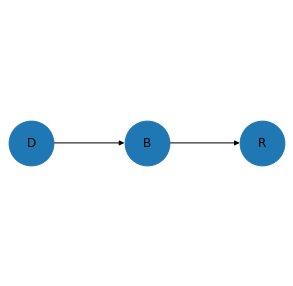

In [6]:
edges_3 : list = [("D", "B"), ("B", "R")]
pos_3: dict = {"D": (1, 1), "B": (2, 1), "R": (3, 1)}
    
dag_3 = DirectedAcyclicGraph(edges=edges_3, pos=pos_3, treatment="D", outcome="R")
dag_3.draw()

This DAG represents the following causal relationships -

1. Taking the drug (D) causes blood pressure (B) to change.
2. A change in blood pressure (B) causes recovery (R) to change.

i.e. The drug does not cause recovery directly, rather the drug impacts on blood pressure which then impacts on recovery.

This third pattern is a collider - 

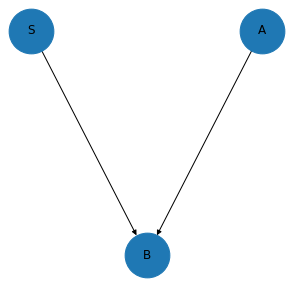

In [7]:
edges_4 : list = [("S", "B"), ("A", "B")]
pos_4: dict = {"S": (1, 2), "B": (2, 1), "A": (3, 2)}
    
dag_4 = DirectedAcyclicGraph(edges=edges_4, pos=pos_4, treatment="D", outcome="R")
dag_4.draw()

This DAG represents the following causal relationships in a hypothetical college that specialises in sport -

1. Sporting ability (S) causes the award of student bursaries (B).
2. Academic ability (A) also causes the award of student bursaries (B).

In the example above where D causes R and G causes both D and R we saw an example of how to condition by taking each gender in turn and why we would want to do this i.e. to isolate the affect of taking the drug on recovery by removing the confounding effect of gender.

This is the overall objective of conditioning any Directed Acyclic Graph but there are some additional factors to consider -

1. There are 3 possible patterns - fork, chain and collider and we have only worked through a fork example so far; we need to understand the impact of conditioning on all 3 patterns.
2. So far we have only seen simple DAGs with a small number of nodes; we need to be able to scale up to larger and more complex DAGs.

Once the first point has been explained the second point becomes easy to understand and at that point it is easy to understand how to condition for any set of causal relationships, no matter how complicated they are.

## Paths

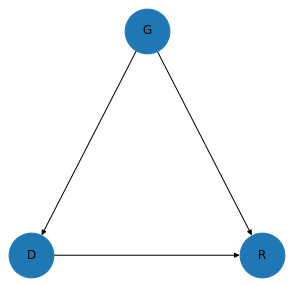

In [11]:
edges_2 : list = [("D", "R"), ("G", "D"), ("G", "R")]
pos_2: dict = {"D": (1, 1), "G": (2,2), "R": (3, 1)}
    
dag_2 = DirectedAcyclicGraph(edges=edges_2, pos=pos_2, treatment="D", outcome="R")
dag_2.draw()

Returning to our first example, there is one more thing to unpack before we can achieve a full understanding of conditioning more complex DAGs.

When I first read Pearl's "The Book of Why" I was able to understood the concept of conditioning paths (see pages 159 - 163) but a couple of key points were not made clear in the text ...

1. A single DAG contains multiple paths and every path needs to be considered in turn when conditioning..
2. Each of those paths begins with the treatment and ends with the outcome.

The DAG above contains exactly 2 paths which can be expressed as follows ...

In [10]:
dag_2.print_paths(dag_2.all_paths(), display_latex=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

... so G or Gender is a fork in the second path.